# EGCI 425 - Step 1: Data Exploration and Visualization

**Dataset:** 2014 and 2015 Cinema Social Media (CSM) Dataset

**Objectives:**
1. Load and explore the dataset
2. Understand data structure and types
3. Identify missing values and data quality issues
4. Visualize distributions and relationships
5. Analyze correlations with target variable (Ratings)

---
## 1. Import Required Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully!")

Libraries imported successfully!


---
## 2. Load the Dataset

In [31]:
file_path = 'dataset/2014 and 2015 CSM dataset.xlsx'

df = pd.read_excel(file_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: 231 rows × 14 columns

First few rows:


,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.30,8,9130,4000000.00,45.00,1,0,3280543,4632,425,636,1120000.00
1,22 Jump Street,2014,7.10,1,192000000,50000000.00,3306.00,2,2,583289,3465,61,186,12350000.00
2,3 Days to Kill,2014,6.20,1,30700000,28000000.00,2872.00,1,0,304861,328,34,47,483000.00
3,300: Rise of an Empire,2014,6.30,1,106000000,110000000.00,3470.00,2,0,452917,2429,132,590,568000.00
4,A Haunted House 2,2014,4.70,8,17300000,3500000.00,2310.00,2,0,3145573,12163,610,1082,1923800.00


---
## 3. Dataset Overview

In [6]:
# Display dataset information
print("="*60)
print("DATASET INFORMATION")
print("="*60)
df.info()

print("\n" + "="*60)
print("COLUMN NAMES")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               230 non-null    float64
 6   Screens              221 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate Followers  196 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB

COLUMN NAME

In [7]:
# Display data types
print("="*60)
print("DATA TYPES")
print("="*60)
print(df.dtypes)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

DATA TYPES
Movie                   object
Year                     int64
Ratings                float64
Genre                    int64
Gross                    int64
Budget                 float64
Screens                float64
Sequel                   int64
Sentiment                int64
Views                    int64
Likes                    int64
Dislikes                 int64
Comments                 int64
Aggregate Followers    float64
dtype: object

Numeric columns (13): ['Year', 'Ratings', 'Genre', 'Gross', 'Budget', 'Screens', 'Sequel', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']
Categorical columns (1): ['Movie']


---
## 4. Descriptive Statistics

In [8]:
# Statistical summary of numeric columns
print("="*60)
print("DESCRIPTIVE STATISTICS - NUMERIC COLUMNS")
print("="*60)
df.describe()

DESCRIPTIVE STATISTICS - NUMERIC COLUMNS


,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
count,231.00,231.00,231.00,231.00,230.00,221.00,231.00,231.00,231.00,231.00,231.00,231.00,196.00
mean,2014.29,6.44,5.36,68066033.20,47921730.05,2209.24,1.36,2.81,3712851.29,12732.54,679.05,1825.70,3038193.45
std,0.46,0.99,4.14,88902891.22,54288246.07,1463.77,0.97,7.00,4511104.24,28825.48,1243.93,3571.04,4886278.07
min,2014.00,3.10,1.00,2470.00,70000.00,2.00,1.00,-38.00,698.00,1.00,0.00,0.00,1066.00
25%,2014.00,5.80,1.00,10300000.00,9000000.00,449.00,1.00,0.00,623302.00,1776.50,105.50,248.50,183025.00
50%,2014.00,6.50,3.00,37400000.00,28000000.00,2777.00,1.00,0.00,2409338.00,6096.00,341.00,837.00,1052600.00
75%,2015.00,7.10,8.00,89350000.00,65000000.00,3372.00,1.00,5.50,5217379.50,15247.50,697.50,2137.00,3694500.00
max,2015.00,8.70,15.00,643000000.00,250000000.00,4324.00,7.00,29.00,32626778.00,370552.00,13960.00,38363.00,31030000.00


In [9]:
# Additional statistics
print("="*60)
print("ADDITIONAL STATISTICS")
print("="*60)

stats_df = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Std Dev': df[numeric_cols].std(),
    'Min': df[numeric_cols].min(),
    'Max': df[numeric_cols].max(),
    'Range': df[numeric_cols].max() - df[numeric_cols].min()
})

stats_df

ADDITIONAL STATISTICS


,Mean,Median,Std Dev,Min,Max,Range
Year,2014.29,2014.00,0.46,2014.00,2015.00,1.00
Ratings,6.44,6.50,0.99,3.10,8.70,5.60
Genre,5.36,3.00,4.14,1.00,15.00,14.00
Gross,68066033.20,37400000.00,88902891.22,2470.00,643000000.00,642997530.00
Budget,47921730.05,28000000.00,54288246.07,70000.00,250000000.00,249930000.00
Screens,2209.24,2777.00,1463.77,2.00,4324.00,4322.00
Sequel,1.36,1.00,0.97,1.00,7.00,6.00
Sentiment,2.81,0.00,7.00,-38.00,29.00,67.00
Views,3712851.29,2409338.00,4511104.24,698.00,32626778.00,32626080.00
Likes,12732.54,6096.00,28825.48,1.00,370552.00,370551.00


---
## 5. Missing Values Analysis

In [10]:
# Count missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(
    by='Missing Count', ascending=False
)

if len(missing_data) > 0:
    print("\nColumns with missing values:")
    print(missing_data)
else:
    print("\n✓ No missing values found!")

MISSING VALUES ANALYSIS

Columns with missing values:
                     Missing Count  Missing Percentage
Aggregate Followers             35               15.15
Screens                         10                4.33
Budget                           1                0.43


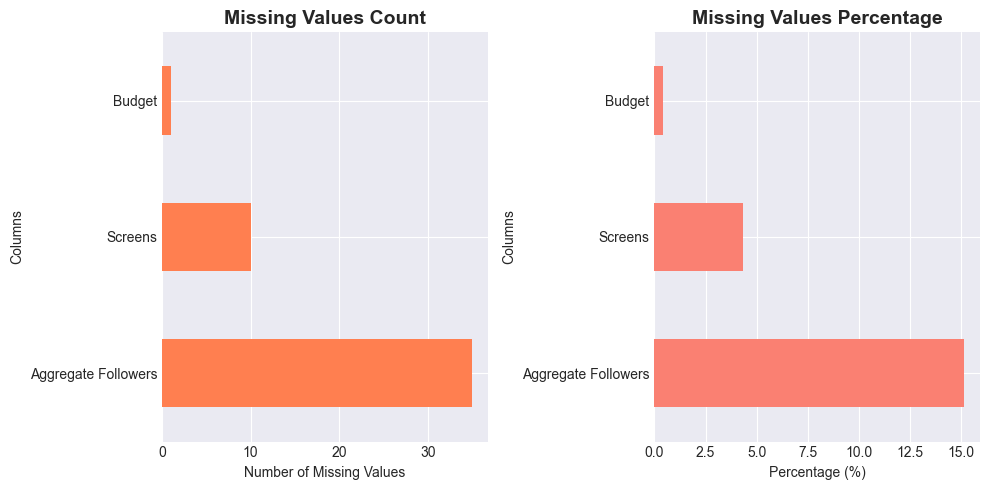

In [11]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    missing_data['Missing Count'].plot(kind='barh', color='coral')
    plt.title('Missing Values Count', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Columns')
    
    plt.subplot(1, 2, 2)
    missing_data['Missing Percentage'].plot(kind='barh', color='salmon')
    plt.title('Missing Values Percentage', fontsize=14, fontweight='bold')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Columns')
    
    plt.tight_layout()
    plt.show()
else:
    print("No visualization needed - no missing values.")

---
## 6. Target Variable Analysis (Ratings)

In [12]:
# Analyze the target variable: Ratings
print("="*60)
print("TARGET VARIABLE: RATINGS")
print("="*60)

print(f"\nMean Rating: {df['Ratings'].mean():.2f}")
print(f"Median Rating: {df['Ratings'].median():.2f}")
print(f"Std Dev: {df['Ratings'].std():.2f}")
print(f"Min Rating: {df['Ratings'].min():.2f}")
print(f"Max Rating: {df['Ratings'].max():.2f}")
print(f"Range: {df['Ratings'].max() - df['Ratings'].min():.2f}")

print("\nRatings Distribution:")
print(df['Ratings'].value_counts().sort_index())

TARGET VARIABLE: RATINGS

Mean Rating: 6.44
Median Rating: 6.50
Std Dev: 0.99
Min Rating: 3.10
Max Rating: 8.70
Range: 5.60

Ratings Distribution:
Ratings
3.10     1
4.00     2
4.20     2
4.30     1
4.40     3
4.50     1
4.60     2
4.70     2
4.80     3
4.90     1
5.00     5
5.10     2
5.20     3
5.40     7
5.50     6
5.60     5
5.70     6
5.80     8
5.90     4
6.00     2
6.10    14
6.20     7
6.30    14
6.40    10
6.50    10
6.60    14
6.70     8
6.80    11
6.90     8
7.00     7
7.10     9
7.20     7
7.30     8
7.40     3
7.50     5
7.60     3
7.70     3
7.80     7
7.90     5
8.00     1
8.10     3
8.20     3
8.30     2
8.60     2
8.70     1
Name: count, dtype: int64


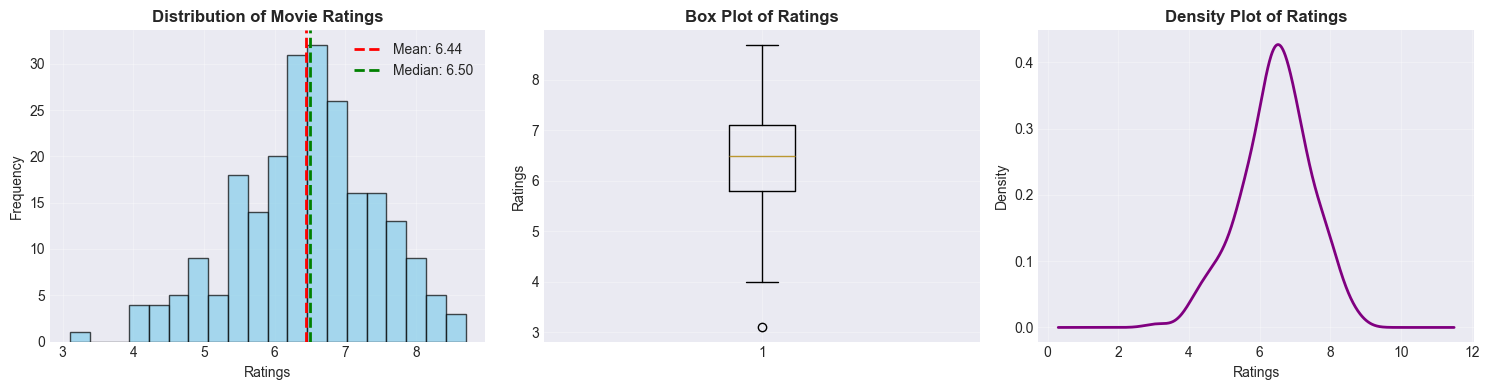

In [13]:
# Visualize Ratings distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df['Ratings'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['Ratings'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Ratings"].mean():.2f}')
axes[0].axvline(df['Ratings'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Ratings"].median():.2f}')
axes[0].set_title('Distribution of Movie Ratings', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Ratings'], vert=True)
axes[1].set_title('Box Plot of Ratings', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Ratings')
axes[1].grid(True, alpha=0.3)

# KDE plot
df['Ratings'].plot(kind='kde', ax=axes[2], color='purple', linewidth=2)
axes[2].set_title('Density Plot of Ratings', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Ratings')
axes[2].set_ylabel('Density')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 7. Correlation Analysis

In [14]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

print("="*60)
print("CORRELATION WITH RATINGS (Target Variable)")
print("="*60)

# Sort correlations with Ratings
ratings_corr = correlation_matrix['Ratings'].sort_values(ascending=False)
print(ratings_corr)

print("\n🔍 Key Observations:")
print(f"Highest positive correlation: {ratings_corr.index[1]} ({ratings_corr.values[1]:.3f})")
print(f"Highest negative correlation: {ratings_corr.index[-1]} ({ratings_corr.values[-1]:.3f})")

CORRELATION WITH RATINGS (Target Variable)
Ratings                1.00
Gross                  0.34
Budget                 0.29
Sentiment              0.14
Sequel                 0.11
Aggregate Followers    0.08
Likes                  0.07
Screens                0.06
Comments               0.02
Views                  0.01
Year                  -0.00
Genre                 -0.12
Dislikes              -0.19
Name: Ratings, dtype: float64

🔍 Key Observations:
Highest positive correlation: Gross (0.342)
Highest negative correlation: Dislikes (-0.187)


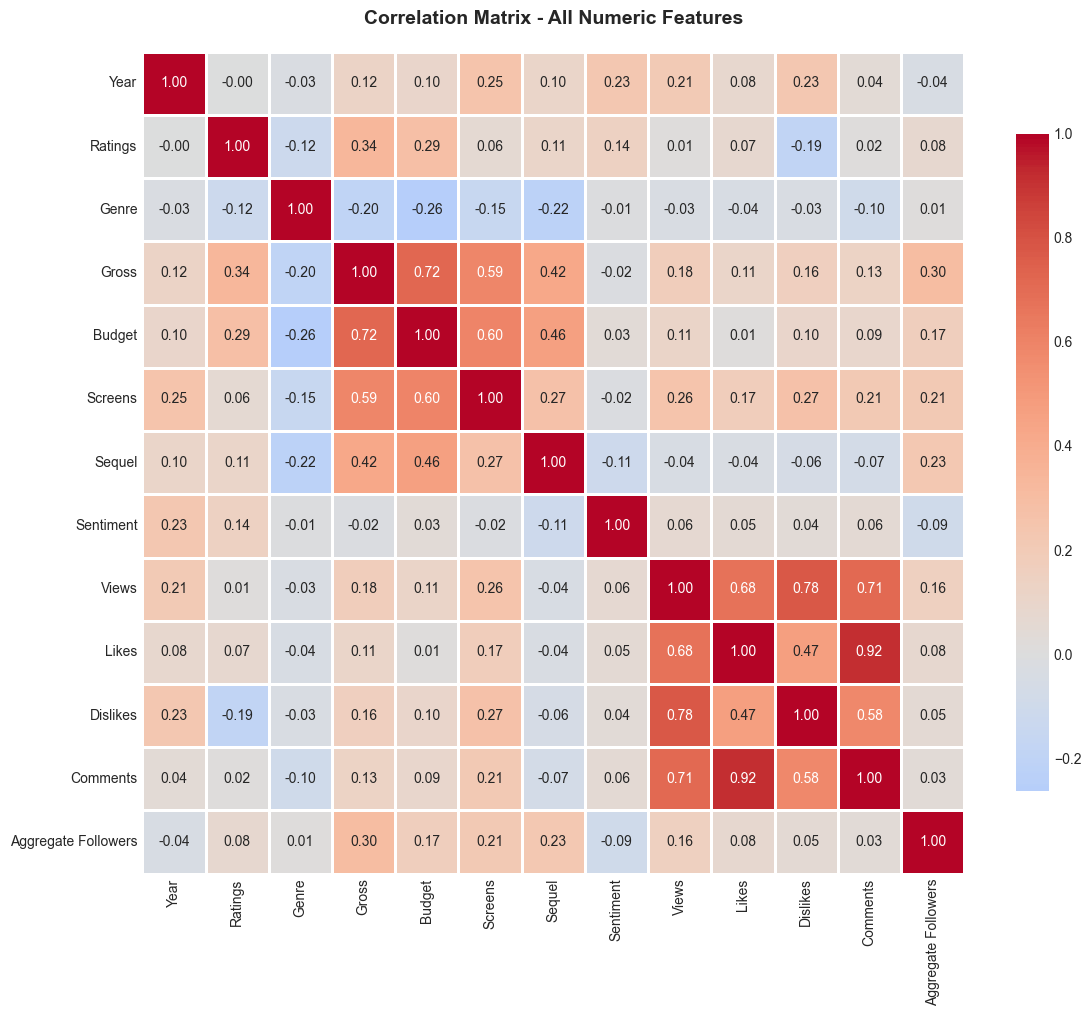

In [15]:
# Visualize correlation matrix - Full heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numeric Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

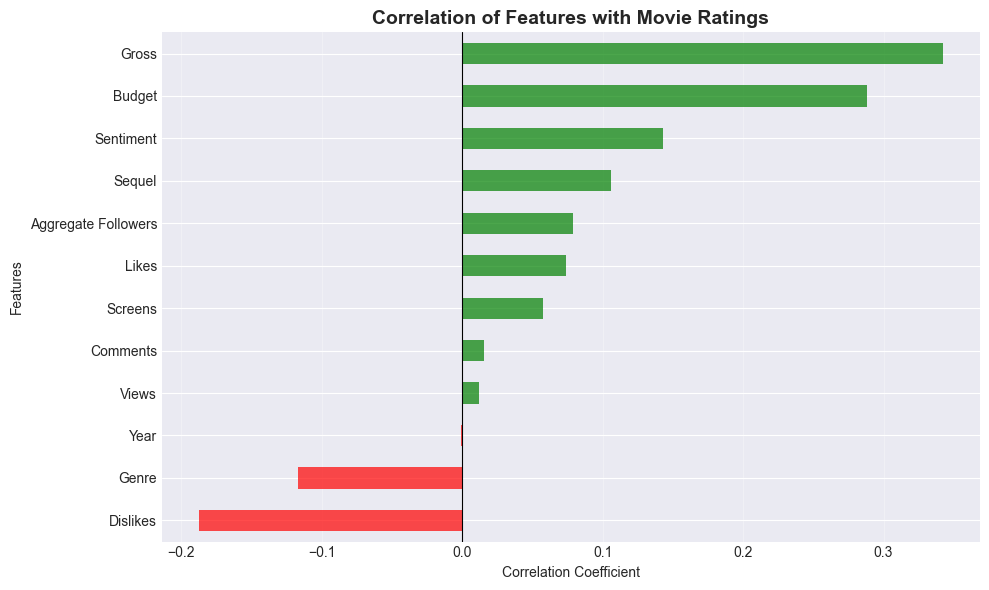

In [16]:
# Visualize correlations with Ratings specifically
plt.figure(figsize=(10, 6))
ratings_corr_sorted = ratings_corr.drop('Ratings').sort_values()
colors = ['red' if x < 0 else 'green' for x in ratings_corr_sorted.values]

ratings_corr_sorted.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Correlation of Features with Movie Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

---
## 8. Feature Distributions

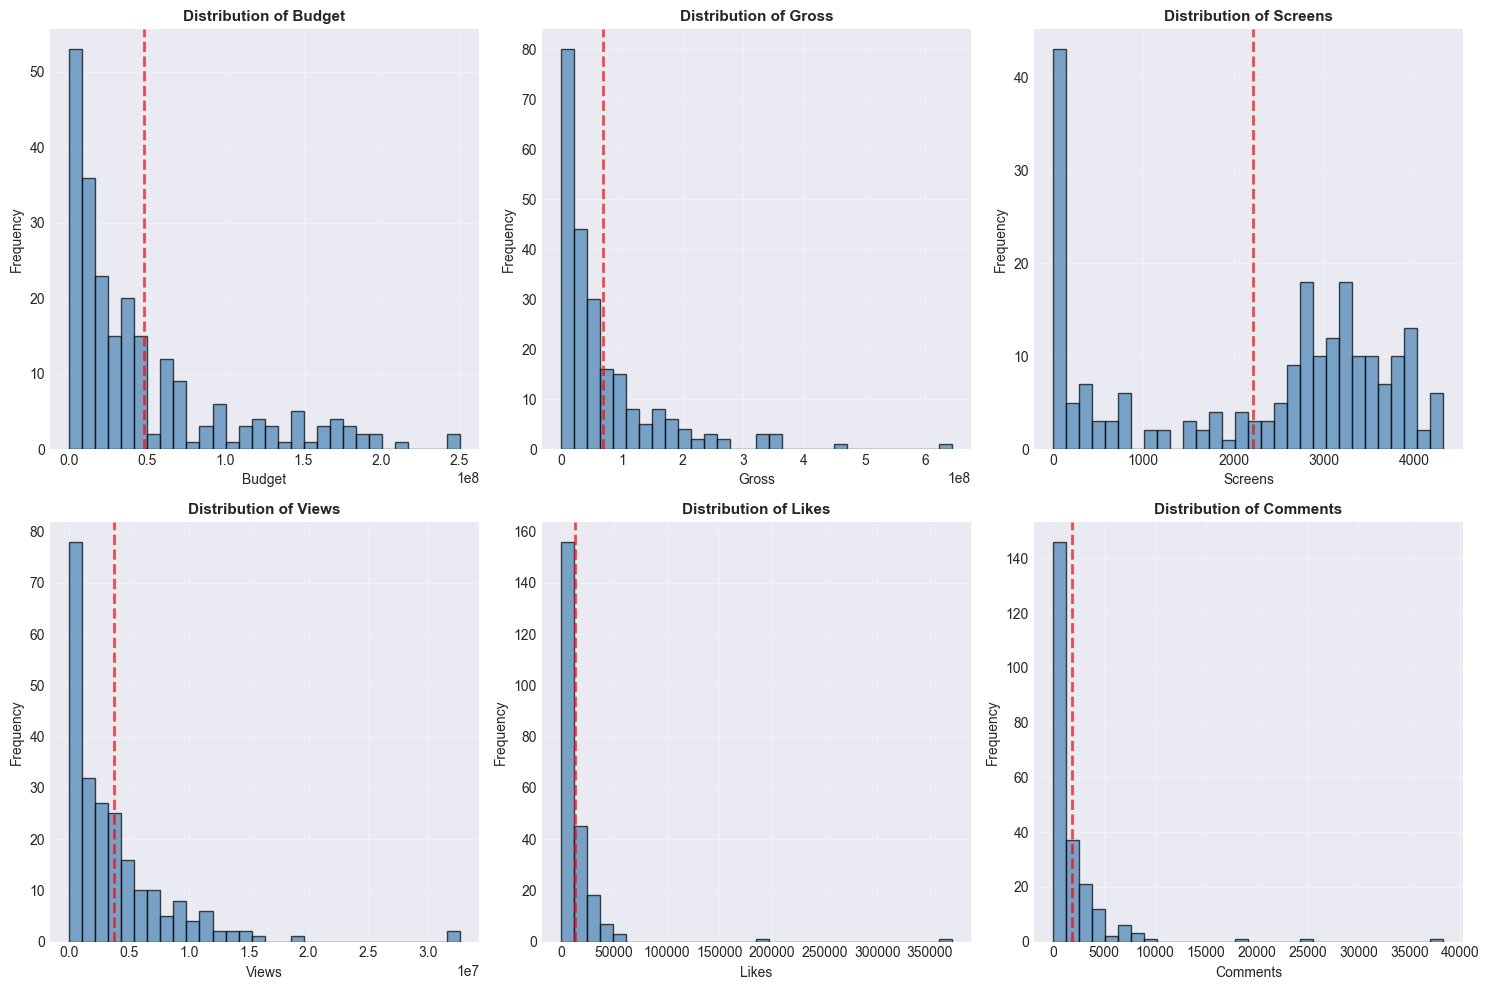

In [17]:
# Visualize distributions of key features
key_features = ['Budget', 'Gross', 'Screens', 'Views', 'Likes', 'Comments']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        axes[idx].hist(df[feature].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)
        
        # Add mean line
        mean_val = df[feature].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

---
## 9. Scatter Plots - Key Relationships

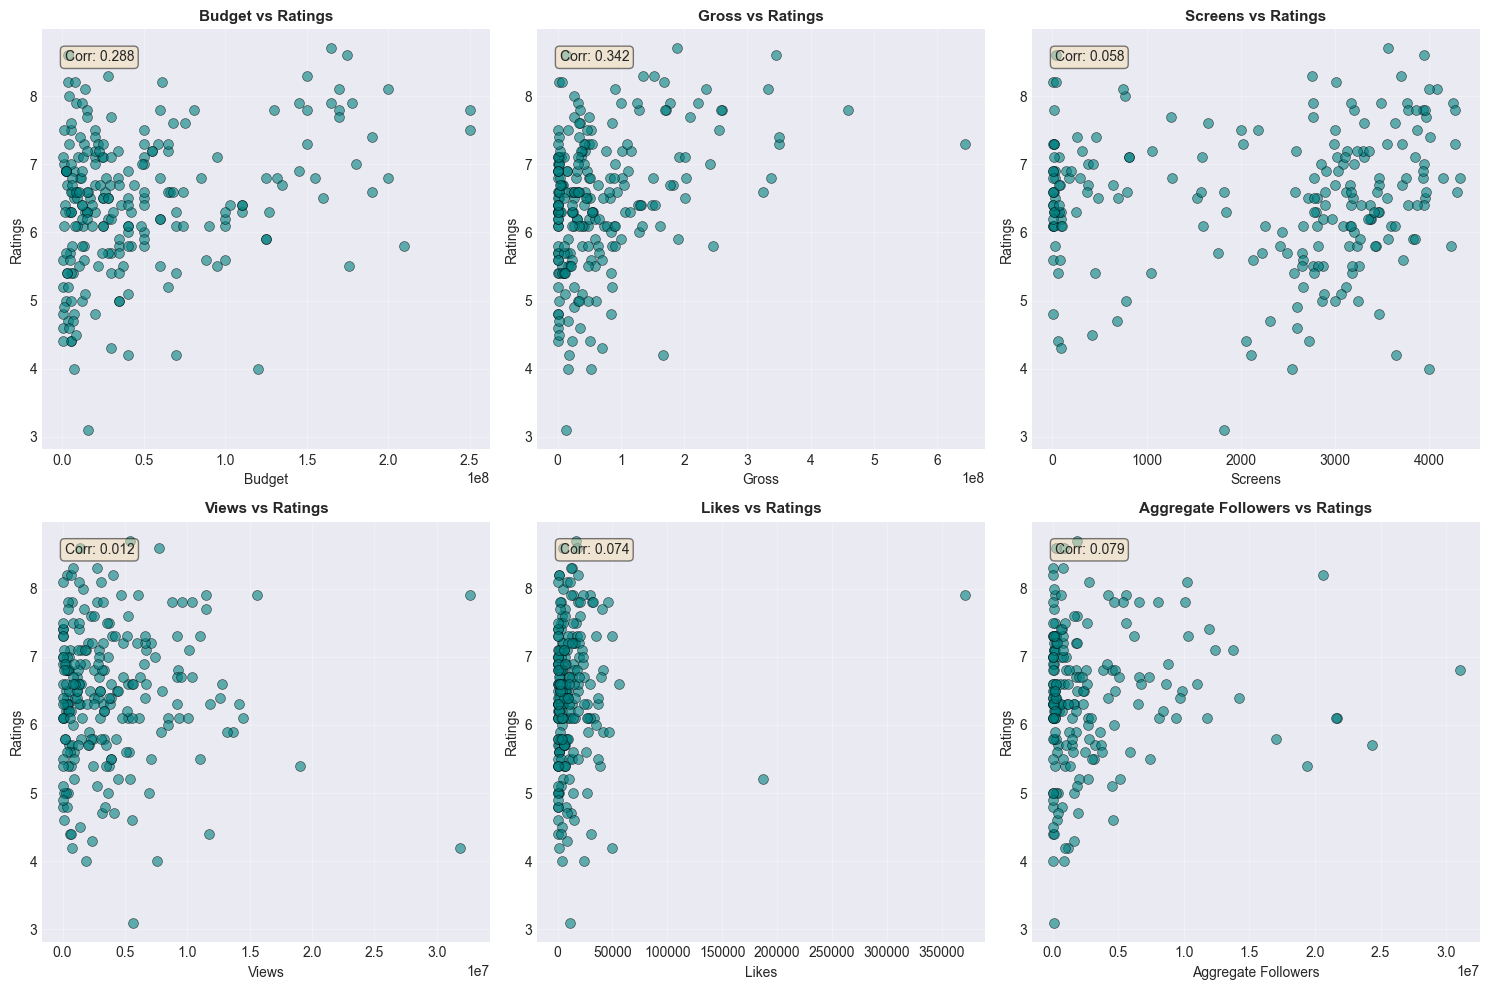

In [18]:
# Scatter plots: Important features vs Ratings
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features_to_plot = ['Budget', 'Gross', 'Screens', 'Views', 'Likes', 'Aggregate Followers']

for idx, feature in enumerate(features_to_plot):
    if feature in df.columns:
        # Remove NaN values for plotting
        mask = df[feature].notna() & df['Ratings'].notna()
        x = df.loc[mask, feature]
        y = df.loc[mask, 'Ratings']
        
        axes[idx].scatter(x, y, alpha=0.6, s=50, color='teal', edgecolors='black', linewidth=0.5)
        axes[idx].set_title(f'{feature} vs Ratings', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Ratings')
        axes[idx].grid(True, alpha=0.3)
        
        # Add correlation value
        if feature in correlation_matrix.columns:
            corr_val = correlation_matrix.loc['Ratings', feature]
            axes[idx].text(0.05, 0.95, f'Corr: {corr_val:.3f}', 
                          transform=axes[idx].transAxes, 
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                          verticalalignment='top')

plt.tight_layout()
plt.show()

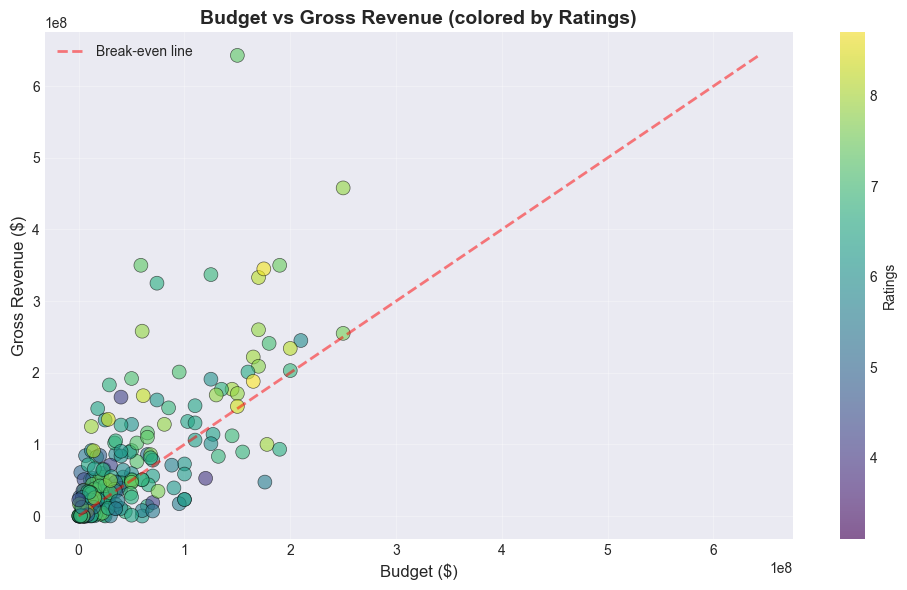

In [19]:
# Special plot: Budget vs Gross (profitability analysis)
plt.figure(figsize=(10, 6))

mask = df['Budget'].notna() & df['Gross'].notna()
plt.scatter(df.loc[mask, 'Budget'], df.loc[mask, 'Gross'], 
           c=df.loc[mask, 'Ratings'], cmap='viridis', 
           s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

plt.colorbar(label='Ratings')
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Gross Revenue ($)', fontsize=12)
plt.title('Budget vs Gross Revenue (colored by Ratings)', fontsize=14, fontweight='bold')

# Add diagonal line (break-even line)
max_val = max(df['Budget'].max(), df['Gross'].max())
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, alpha=0.5, label='Break-even line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 10. Social Media Metrics Analysis

In [20]:
# Analyze social media features
social_media_features = ['Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers', 'Sentiment']

print("="*60)
print("SOCIAL MEDIA METRICS - STATISTICS")
print("="*60)

for feature in social_media_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        print(f"  Mean: {df[feature].mean():,.2f}")
        print(f"  Median: {df[feature].median():,.2f}")
        print(f"  Max: {df[feature].max():,.2f}")
        if feature in correlation_matrix.columns:
            print(f"  Correlation with Ratings: {correlation_matrix.loc['Ratings', feature]:.3f}")

SOCIAL MEDIA METRICS - STATISTICS

Views:
  Mean: 3,712,851.29
  Median: 2,409,338.00
  Max: 32,626,778.00
  Correlation with Ratings: 0.012

Likes:
  Mean: 12,732.54
  Median: 6,096.00
  Max: 370,552.00
  Correlation with Ratings: 0.074

Dislikes:
  Mean: 679.05
  Median: 341.00
  Max: 13,960.00
  Correlation with Ratings: -0.187

Comments:
  Mean: 1,825.70
  Median: 837.00
  Max: 38,363.00
  Correlation with Ratings: 0.016

Aggregate Followers:
  Mean: 3,038,193.45
  Median: 1,052,600.00
  Max: 31,030,000.00
  Correlation with Ratings: 0.079

Sentiment:
  Mean: 2.81
  Median: 0.00
  Max: 29.00
  Correlation with Ratings: 0.143


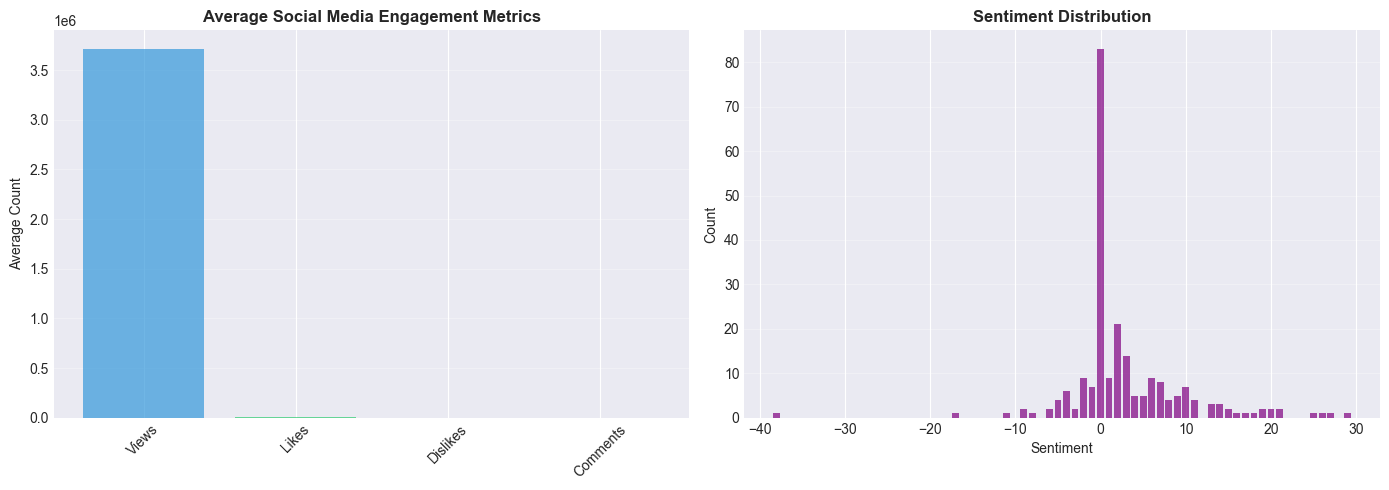

In [21]:
# Compare social media engagement
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Engagement metrics comparison
engagement = df[['Views', 'Likes', 'Dislikes', 'Comments']].mean()
axes[0].bar(engagement.index, engagement.values, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], alpha=0.7)
axes[0].set_title('Average Social Media Engagement Metrics', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Count')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Sentiment distribution
if 'Sentiment' in df.columns:
    sentiment_counts = df['Sentiment'].value_counts().sort_index()
    axes[1].bar(sentiment_counts.index, sentiment_counts.values, color='purple', alpha=0.7)
    axes[1].set_title('Sentiment Distribution', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Sentiment')
    axes[1].set_ylabel('Count')
    axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
## 11. Year and Genre Analysis

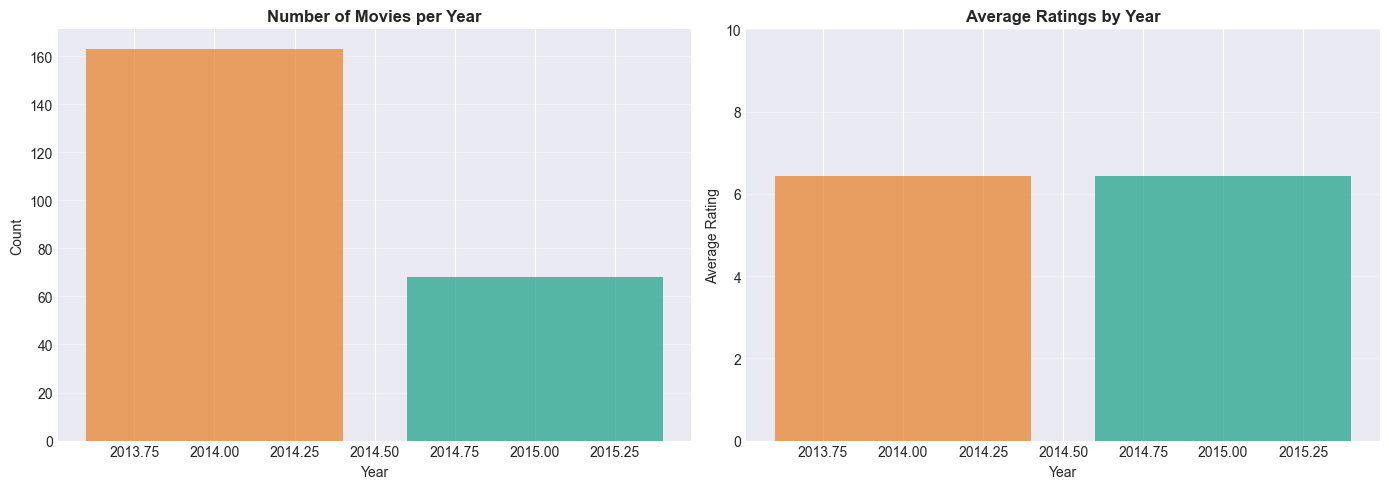


Average Ratings by Year:
Year
2014   6.44
2015   6.44
Name: Ratings, dtype: float64


In [22]:
# Analyze by Year
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Movies per year
year_counts = df['Year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, color=['#e67e22', '#16a085'], alpha=0.7)
axes[0].set_title('Number of Movies per Year', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3, axis='y')

# Average ratings by year
year_ratings = df.groupby('Year')['Ratings'].mean()
axes[1].bar(year_ratings.index, year_ratings.values, color=['#e67e22', '#16a085'], alpha=0.7)
axes[1].set_title('Average Ratings by Year', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim([0, 10])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nAverage Ratings by Year:")
print(year_ratings)

GENRE ANALYSIS

Genre distribution:
Genre
1     65
8     54
3     46
9     13
12    13
10    12
2     12
15    10
6      3
7      2
4      1
Name: count, dtype: int64

Average ratings by genre:
       mean  count
Genre             
9      7.08     13
12     7.03     13
2      6.78     12
10     6.68     12
1      6.49     65
3      6.49     46
4      6.40      1
8      6.27     54
6      6.17      3
15     4.98     10
7      4.80      2


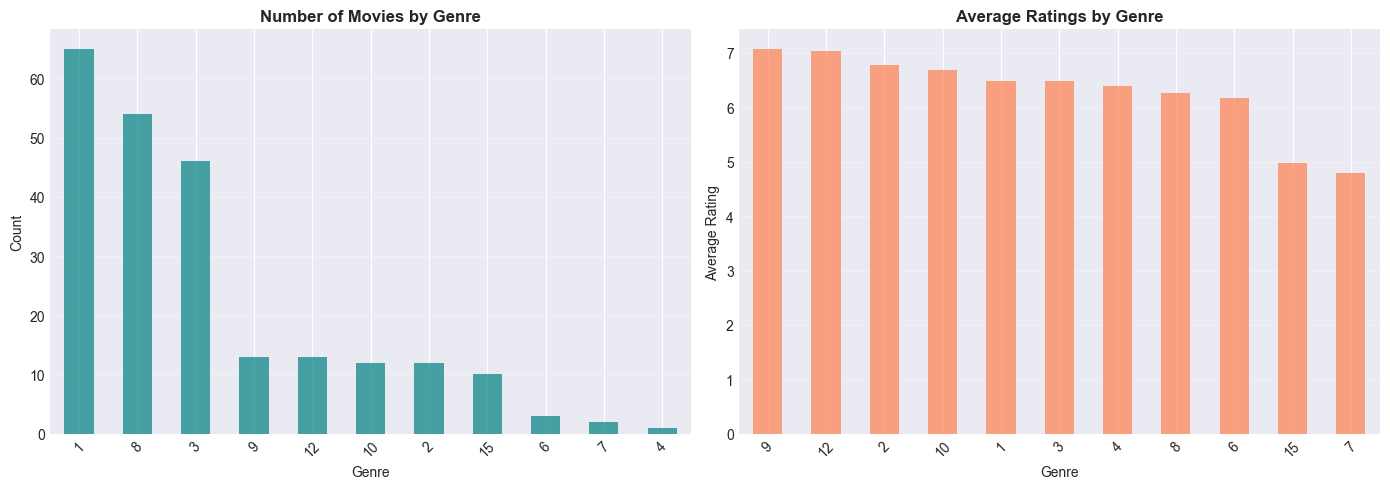

In [23]:
# Analyze Genre
if 'Genre' in df.columns:
    print("="*60)
    print("GENRE ANALYSIS")
    print("="*60)
    
    genre_counts = df['Genre'].value_counts()
    print("\nGenre distribution:")
    print(genre_counts)
    
    # Average ratings by genre
    genre_ratings = df.groupby('Genre')['Ratings'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print("\nAverage ratings by genre:")
    print(genre_ratings)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    genre_counts.plot(kind='bar', ax=axes[0], color='teal', alpha=0.7)
    axes[0].set_title('Number of Movies by Genre', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Genre')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    genre_ratings['mean'].plot(kind='bar', ax=axes[1], color='coral', alpha=0.7)
    axes[1].set_title('Average Ratings by Genre', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Genre')
    axes[1].set_ylabel('Average Rating')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

---
## 12. Outlier Detection

In [24]:
# Detect outliers using IQR method
print("="*60)
print("OUTLIER DETECTION (IQR Method)")
print("="*60)

outlier_features = ['Budget', 'Gross', 'Views', 'Likes', 'Comments']

for feature in outlier_features:
    if feature in df.columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        
        print(f"\n{feature}:")
        print(f"  Lower bound: {lower_bound:,.2f}")
        print(f"  Upper bound: {upper_bound:,.2f}")
        print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

OUTLIER DETECTION (IQR Method)

Budget:
  Lower bound: -75,000,000.00
  Upper bound: 149,000,000.00
  Number of outliers: 21 (9.1%)

Gross:
  Lower bound: -108,275,000.00
  Upper bound: 207,925,000.00
  Number of outliers: 16 (6.9%)

Views:
  Lower bound: -6,267,814.25
  Upper bound: 12,108,495.75
  Number of outliers: 10 (4.3%)

Likes:
  Lower bound: -18,430.00
  Upper bound: 35,454.00
  Number of outliers: 15 (6.5%)

Comments:
  Lower bound: -2,584.25
  Upper bound: 4,969.75
  Number of outliers: 18 (7.8%)


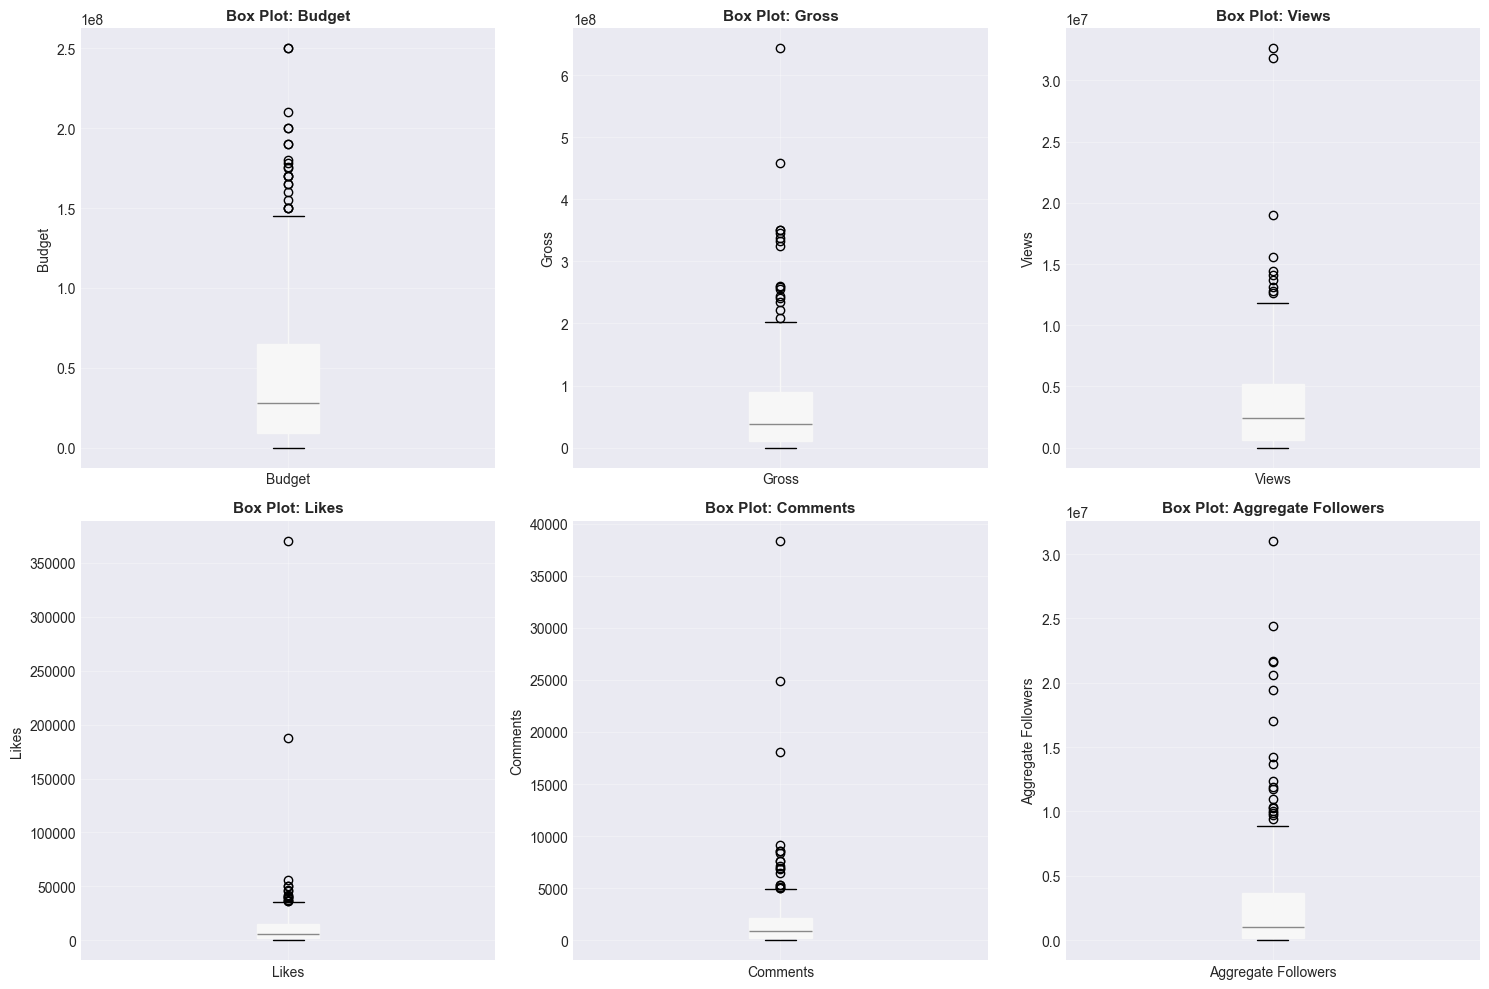

In [25]:
# Box plots for outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features_boxplot = ['Budget', 'Gross', 'Views', 'Likes', 'Comments', 'Aggregate Followers']

for idx, feature in enumerate(features_boxplot):
    if feature in df.columns:
        df.boxplot(column=feature, ax=axes[idx], patch_artist=True)
        axes[idx].set_title(f'Box Plot: {feature}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel(feature)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 13. Summary of Key Findings

In [30]:
print("SUMMARY OF KEY FINDINGS")

print("\n DATASET:")
print(f"  • Total movies: {len(df)}")
print(f"  • Total features: {len(df.columns)}")
print(f"  • Years covered: {df['Year'].min()} - {df['Year'].max()}")

print("\n TARGET VARIABLE (Ratings):")
print(f"  • Mean: {df['Ratings'].mean():.2f}")
print(f"  • Range: {df['Ratings'].min():.2f} - {df['Ratings'].max():.2f}")

print("\n MISSING VALUES:")
if len(missing_data) > 0:
    for col in missing_data.index:
        print(f"  • {col}: {missing_data.loc[col, 'Missing Count']:.0f} ({missing_data.loc[col, 'Missing Percentage']:.1f}%)")
else:
    print("  • No missing values")

print("\n TOP 5 CORRELATIONS WITH RATINGS:")
top_corr = ratings_corr.drop('Ratings').head(5)
for feature, corr in top_corr.items():
    print(f"  • {feature}: {corr:.3f}")

print("\n DATA QUALITY ISSUES TO ADDRESS:")
print("  1. Missing values in Budget, Screens, Aggregate Followers")
print("  2. Potential outliers in Budget, Gross, and social media metrics")
print("  3. Skewed distributions in several features")

print("STEP 1 COMPLETED!")

SUMMARY OF KEY FINDINGS

 DATASET:
  • Total movies: 231
  • Total features: 14
  • Years covered: 2014 - 2015

 TARGET VARIABLE (Ratings):
  • Mean: 6.44
  • Range: 3.10 - 8.70

 MISSING VALUES:
  • Aggregate Followers: 35 (15.2%)
  • Screens: 10 (4.3%)
  • Budget: 1 (0.4%)

 TOP 5 CORRELATIONS WITH RATINGS:
  • Gross: 0.342
  • Budget: 0.288
  • Sentiment: 0.143
  • Sequel: 0.106
  • Aggregate Followers: 0.079

 DATA QUALITY ISSUES TO ADDRESS:
  1. Missing values in Budget, Screens, Aggregate Followers
  2. Potential outliers in Budget, Gross, and social media metrics
  3. Skewed distributions in several features
STEP 1 COMPLETED!
